# Prediksi Hujan di Denpasar

Praktikum ini menggunakan _dataset_ [Denpasar Weather Data](https://www.kaggle.com/datasets/cornflake15/denpasarbalihistoricalweatherdata?select=openweatherdata-denpasar-1990-2020v0.1.csv) dengan modifikasi. _Dataset_ digunakan untuk melakukan prediksi penarikan kesimpulan kebenaran kondisi hujan pada kondisi tertentu. Hal itu diperoleh dengan meninjau `raining` (diekstrak dari `weather_main`) sebagai target. Fitur yang digunakan adalah sebagai berikut:
- `hour` (diekstrak dari `dt_iso`)
- `temp`
- `temp_min`
- `temp_max`
- `pressure`
- `humidity`
- `wind_speed`
- `wind_deg`

Tujuan praktikum:
1.   Peserta memahami rangkaian proses analitik data menggunakan pendekatan pembelajaran mesin. 
2.   Peserta memahami bahwa proses pengembangan model pembelajaran mesin juga ditentukan dari kualitas data, penanganan data, dan penentuan algoritma serta hiperparameternya; tidak cukup hanya dengan memastikan implementasi algoritma berjalan tanpa kesalahan.
3.   Peserta mampu menginterpretasikan hasil dari evaluasi model dalam proses analitik menggunakan pendekatan pembelajaran mesin.

Praktikum dilaksanakan secara berkelompok. Setiap kelompok terdiri atas 2 mahasiswa. Perhatikan bahwa terdapat berkas yang harus dikumpulkan sebelum waktu praktikum selesai (17 April 2023, pukul 10.59 WIB) dan berkas yang dikumpulkan setelah waktu praktikum selesai (17 April 2023, pukul 23.59 WIB).

# Persiapan Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("openweatherdata-denpasar-1990-2020v0.1-simplified.csv")
data

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
0,0,25.82,25.82,25.82,1010.0,86,1.36,225,True
1,1,26.20,26.20,26.20,1011.0,84,2.09,247,True
2,2,26.45,26.45,26.45,1011.0,84,2.44,262,True
3,3,26.80,26.80,26.80,1011.0,82,2.29,271,True
4,4,27.04,27.04,27.04,1010.0,82,1.71,274,False
...,...,...,...,...,...,...,...,...,...
264919,19,27.00,27.00,27.00,1007.0,94,4.10,300,False
264920,20,27.00,27.00,27.00,1007.0,94,5.70,300,False
264921,21,28.00,28.00,28.00,1007.0,83,6.70,290,False
264922,22,28.00,28.00,28.00,1007.0,83,6.20,290,False


In [3]:
X = data.drop(columns="raining")
y = data["raining"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Soal

Disediakan data yang sudah dibagi menjadi data latih (`df_train`), data validasi (`df_val`), dan data uji (`df_test`).

**Bagian 1**: (batas waktu: 17 April 2023, 10.59 WIB)

1. Buatlah _baseline_ dengan menggunakan model _logistic regression_.
2. Lakukan analisis data terkait hal berikut:
    - _duplicate value_,
    - _missing value_,
    - _outlier_,
    - _balance of data_.
3. Jelaskan rencana penanganan yang ada pada poin 2.
4. Jelaskan teknik _encoding_ yang digunakan terhadap data yang disediakan, disertai dengan alasan.
5. Buatlah desain eksperimen dengan menentukan hal berikut:
    - tujuan eksperimen,
    - variabel dependen dan independen,
    - strategi eksperimen,
    - skema validasi.
    
**Bagian 2**: (batas waktu: 17 April 2023, 23.59 WIB)

6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5.
7. Berdasarkan hasil prediksi yang dihasilkan, buatlah kesimpulan analisis karakteristik kondisi hujan.

---

Jika terdapat perubahan jawaban pada poin 1—5 (contoh: perbedaan penanganan _outlier_), jelaskan pada laporan mengenai jawaban sebelum, jawaban sesudah, dan alasan pengubahan jawaban.

Pada sel ini, jelaskan pembagian tugas/kerja per anggota kelompok dalam eksperimen.

# _Deliverable_

_Deliverable_ yang akan dihasilkan adalah sebagai berikut:
1. berkas _notebook_ dengan format nama `PraktikumIF3270_M1_NIM1_NIM2.ipynb` untuk Bagian 1;
2. berkas _notebook_ dengan format nama `PraktikumIF3270_M2_NIM1_NIM2.ipynb` untuk Bagian 1 + Bagian 2; serta
3. berkas laporan dengan format nama `PraktikumIF3270_NIM1_NIM2.pdf` yang mencakup hal berikut:
    - hasil analisis data,
    - penanganan dari hasil analisis data,
    - justifikasi teknik-teknik yang dipilih,
    - perubahan yang dilakukan pada jawaban poin 1—5 jika ada,
    - desain eksperimen,
    - hasil eksperimen.
    - analisis dari hasil eksperimen,
    - kesimpulan,
    - pembagian tugas/kerja per anggota kelompok

Batas waktu pengumpulan:
- _Deliverable_ poin 1: Senin, 17 April 2023, pukul 10.59 WIB
- _Deliverable_ poin 2: Senin, 17 April 2023, pukul 23.59 WIB
- _Deliverable_ poin 3: Senin, 17 April 2023, pukul 23.59 WIB

# 1. Baseline Logistic Regression

In [4]:
# 1. Buatlah baseline dengan menggunakan model logistic regression.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=42)

lr.fit(X_train, y_train)

## Predict data test
y_pred_test = lr.predict(X_test)

print("Evaluasi dari model logistic regression dengan data test: ")
print(classification_report(y_test, y_pred_test))
print('Accuracy: ', accuracy_score(y_test, y_pred_test))
print('Precision: ', precision_score(y_test, y_pred_test))
print('Recall: ', recall_score(y_test, y_pred_test))
print('F1 Score: ', f1_score(y_test, y_pred_test))

## Predict data validation
y_pred_val = lr.predict(X_val)

print("Evaluasi dari model logistic regression dengan data validation: ")
print(classification_report(y_val, y_pred_val))
print('Accuracy: ', accuracy_score(y_val, y_pred_val))
print('Precision: ', precision_score(y_val, y_pred_val))
print('Recall: ', recall_score(y_val, y_pred_val))
print('F1 Score: ', f1_score(y_val, y_pred_val))

Evaluasi dari model logistic regression dengan data test: 
              precision    recall  f1-score   support

       False       0.88      0.99      0.93     45994
        True       0.58      0.13      0.21      6991

    accuracy                           0.87     52985
   macro avg       0.73      0.56      0.57     52985
weighted avg       0.84      0.87      0.84     52985

Accuracy:  0.8728508068321224
Precision:  0.5824675324675325
Recall:  0.12830782434558718
F1 Score:  0.21029187668503105
Evaluasi dari model logistic regression dengan data validation: 
              precision    recall  f1-score   support

       False       0.88      0.99      0.93     36791
        True       0.59      0.14      0.22      5597

    accuracy                           0.87     42388
   macro avg       0.74      0.56      0.58     42388
weighted avg       0.84      0.87      0.84     42388

Accuracy:  0.8736198924223837
Precision:  0.5940438871473355
Recall:  0.13542969447918526
F1 Score:  

# 2 dan 3

## Analisis dan Rencana Penanganan


In [5]:
data.head()

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
0,0,25.82,25.82,25.82,1010.0,86,1.36,225,True
1,1,26.20,26.20,26.20,1011.0,84,2.09,247,True
2,2,26.45,26.45,26.45,1011.0,84,2.44,262,True
3,3,26.80,26.80,26.80,1011.0,82,2.29,271,True
4,4,27.04,27.04,27.04,1010.0,82,1.71,274,False


## Duplicate Value

Tidak terdapat banyak nilai duplikat pada masing-masing kolom, sehingga tidak akan dilakukan penanganan khusus mengenai nilai duplikat tiap kolom.

Selain itu, terdapat beberapa entry yang duplikat. Hal ini akan dibahas lebih lanjut di balance data, karena kita ingin memastikan keseimbangan yang benar pada target.

Berikut jumlah value unik untuk tiap kolom

In [6]:
X.nunique(axis=0)

hour            24
temp          1221
temp_min       729
temp_max       721
pressure       170
humidity        66
wind_speed    1093
wind_deg       361
dtype: int64

Berikut jumlah entry yang unik pada data.

In [7]:
print(f"Jumlah entry yang duplikat: {data[data.duplicated()].shape[0]}")
print(f"Jumlah entry yang tidak duplikat: {data.drop_duplicates().shape[0]}")
print(f"Jumlah total row: {data.shape[0]}")

Jumlah entry yang duplikat: 7253
Jumlah entry yang tidak duplikat: 257671
Jumlah total row: 264924


## Missing Value

Tidak terdapat missing value pada bagian X dataset.

In [8]:
X.isna().sum()

hour          0
temp          0
temp_min      0
temp_max      0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
dtype: int64

## Outlier

Outlier pada data bisa berdampak buruk pada model. Oleh karena itu, diperlukan penanganan outlier. Berikut cara-cara penanganan outlier:

 - Normalisasi
 - Penghapusan outlier
 - Transformasi

Pada eksperimen ini, akan digunakan penghapusan outlier. Namun, masih perlu dilakukan pengetesan lebih lanjut nantinya.

In [9]:
from IPython.display import display, HTML

def get_outlier(df_column):
  Q1 = df_column.quantile(0.25)
  Q3 = df_column.quantile(0.75)
  IQR = Q3 - Q1
  LB = Q1 - 1.5 * IQR
  UB = Q3 + 1.5 * IQR
  return df_column.loc[(df_column < LB) | (df_column > UB)]

for col in X.columns:
  print(f"Number of outlier for {col:<11}: {get_outlier(X[col]).count()}")

Number of outlier for hour       : 0
Number of outlier for temp       : 1458
Number of outlier for temp_min   : 1716
Number of outlier for temp_max   : 547
Number of outlier for pressure   : 1067
Number of outlier for humidity   : 231
Number of outlier for wind_speed : 3439
Number of outlier for wind_deg   : 0


## Balance of Data

Dari hasil kode dibawah, terlihat bahwa ada sedikit data raining yang bernilai true. Ketidakseimbangan ini akan ditangani dengan melakukan oversampling.

In [10]:
y.value_counts()

False    230023
True      34901
Name: raining, dtype: int64

In [11]:
y.value_counts() / y.count()

False    0.86826
True     0.13174
Name: raining, dtype: float64

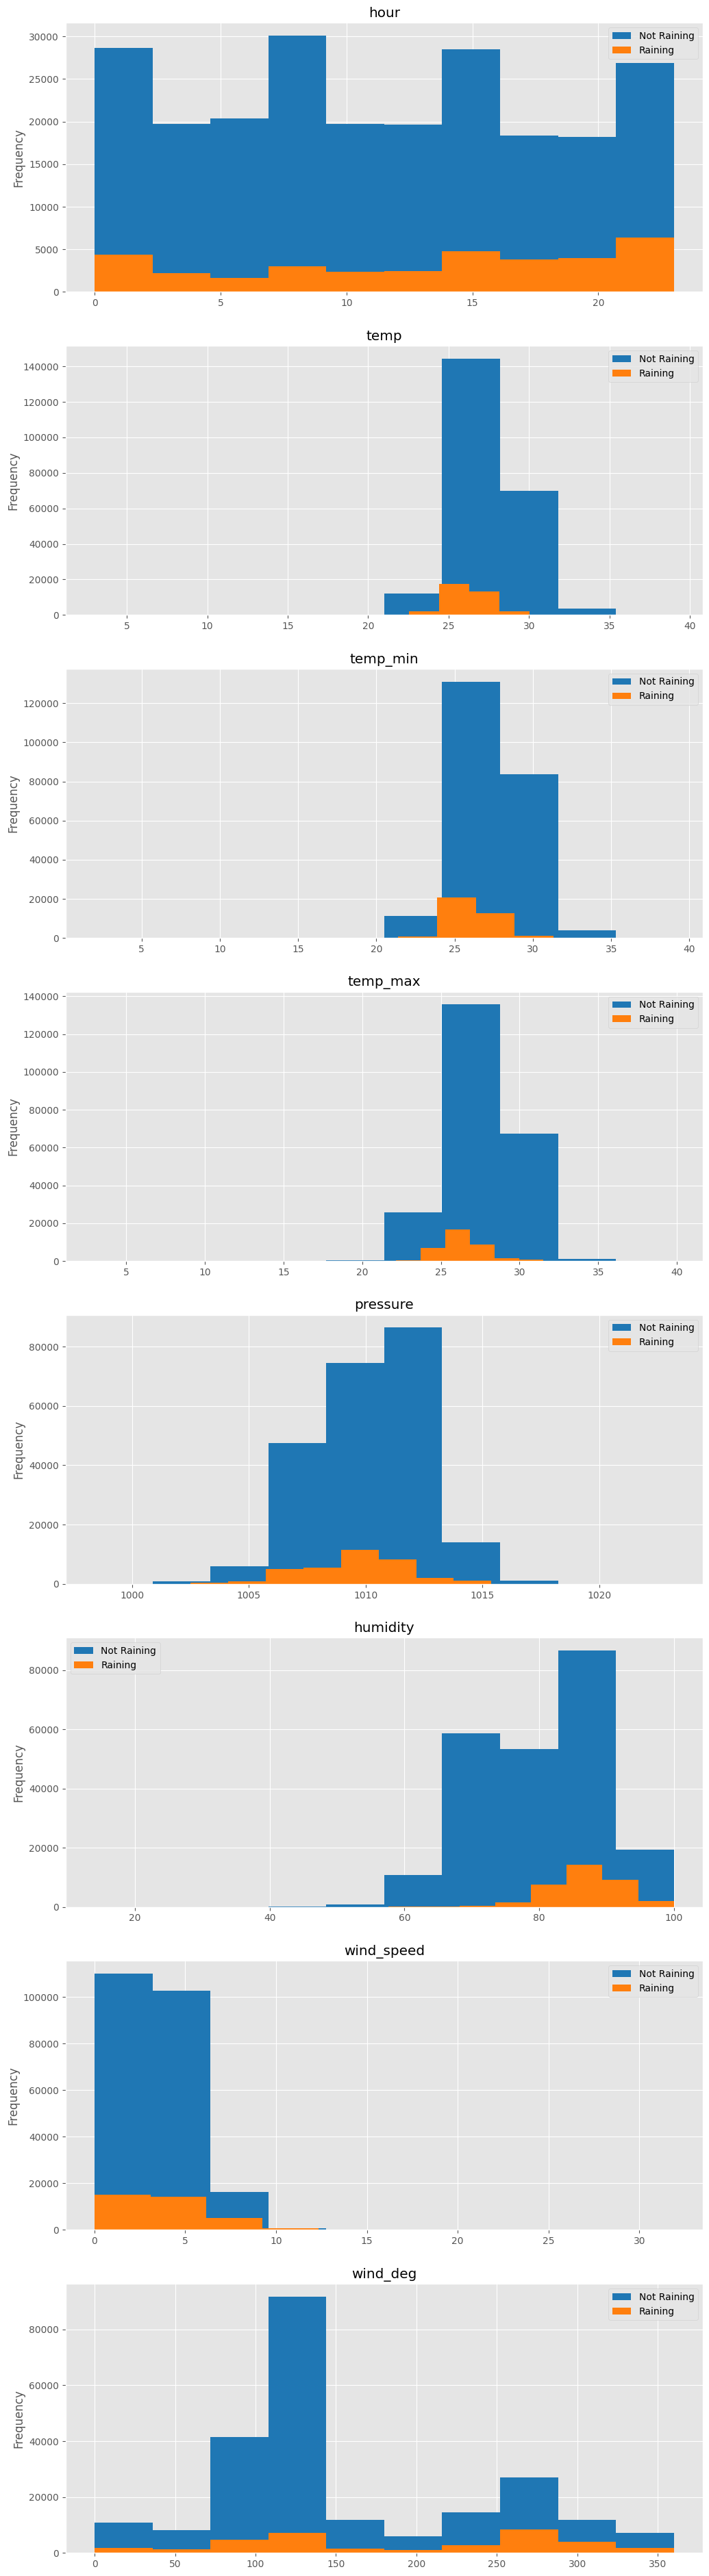

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=len(data.columns) - 1, ncols=1, figsize=(12, (len(data.columns) - 1) * 6))
for i, col in enumerate(data.columns):
  if col == 'raining':
    continue
  data[~data['raining']][col].plot.hist(ax=axes[i], label='Not Raining', color='tab:blue')
  data[data['raining']][col].plot.hist(ax=axes[i], label='Raining', color='tab:orange')
  axes[i].set_title(col)
  axes[i].legend()

# show the plot
fig.show()

# 4. Jelaskan teknik encoding yang digunakan terhadap data yang disediakan, disertai dengan alasan.

Teknik encoding yang tepat untuk digunakan terhadap data yang disediakan adalah dengan melakukan scaling dengan MinMaxScaler. Hal ini dikarenakan tipe data dari setiap fitur yang tersedia berupa tipe data numerikal yang memiliki nilai kontinu. Dengan encoding menggunakan metode scaling, maka data akan 
diubah ke rentang 0 sampai 1.


# 5. Buatlah desain eksperimen dengan menentukan hal berikut:
## Tujuan Eksperimen

Tujuan eksperimen adalah untuk mencari model yang lebih baik atau meningkatkan kinerja dari model baseline (logistic regression) yang telah digunakan. Sebuah model dikatakan lebih baik apabila
memiliki nilai metrik yang lebih tinggi daripada model baseline. 

## Variabel dependen dan independen

Variable dependen pada eksperimen kali ini adalah 'raining' sedangkan variable independen pada eksperimen kali ini adalah 'hour', 'temp', 'temp_min', 'temp_max', 'pressure','humidity', 'wind_speed', 'wind_deg'.

## Strategi eksperimen

Strategi eksperimen yang akan digunakan adalah strategi Oversampling. Hal ini dikarenakan dataset yang tersedia tidak memiliki balance yang baik, data dengan kelas False sejumlah 86% dan data dengan kelas True sejumlah 14%. Dengan dilakukannya strategi Oversampling maka data dengan kelas True akan diduplikat sehingga memiliki jumlah yang sama dengan data dengan kelas False

## Skema validasi

Skema validasi yang akan dilakukan pada eksperimen kali ini adalah dengan metode Cross-validation dengan membagi data set menjadi beberapa subset (k-fold) dan model dilatih pada subset tertentu dan diuji pada subset yang lain. Kemudian hasil pengujian dihitung secara rata-rata dari seluruh subset.

# 6

In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

over_sampler = RandomOverSampler(random_state = 42)
lr = LogisticRegression(
    random_state=42, 
    max_iter=1000 #Supaya gak dapet warning
)

pipeline = make_pipeline(over_sampler, lr)
scorers = ['accuracy', 'precision', 'recall', 'f1']

over_X, over_y = over_sampler.fit_resample(X, y)
np_cv_results = cross_validate(lr, over_X, over_y, cv=5, scoring=scorers)
print(f"Non-Pipeline CV Result: {np_cv_results}")

p_cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scorers)
print(f"Pipeline CV Result: {p_cv_results}")

# Ini memang beda
# https://stackoverflow.com/questions/63120481/imblearn-pipeline-resulting-in-poor-metrics

Non-Pipeline CV Result: {'fit_time': array([3.67352772, 3.05165434, 2.91425848, 6.0990088 , 3.70625329]), 'score_time': array([0.15294456, 0.20758724, 0.1950264 , 0.21480846, 0.13351846]), 'test_accuracy': array([0.68887077, 0.71454966, 0.72497256, 0.71353889, 0.75175255]), 'test_precision': array([0.66525295, 0.69720885, 0.71176037, 0.6989892 , 0.75540853]), 'test_recall': array([0.7603304 , 0.75852625, 0.75617868, 0.75008695, 0.74458743]), 'test_f1': array([0.70962114, 0.72657616, 0.7332975 , 0.72363716, 0.74995895])}
Pipeline CV Result: {'fit_time': array([1.56288695, 1.45709753, 2.87029886, 1.77982283, 2.14515829]), 'score_time': array([0.07878089, 0.07827091, 0.14113665, 0.07055449, 0.07553911]), 'test_accuracy': array([0.65792205, 0.69168633, 0.70463339, 0.71790129, 0.77823494]), 'test_precision': array([0.23431242, 0.2639996 , 0.2788491 , 0.29367587, 0.32819478]), 'test_recall': array([0.70391061, 0.74971347, 0.78309456, 0.81232092, 0.65272206]), 'test_f1': array([0.35159017, 0.